# Capstone Project - Car Accident Severity
#### Applied Data Science Capstone by IBM/Coursera

## Business Understanding

We have to predict the severity of accident based on historical crash date. There are total 38 columns, 1 of which is the severity itself. 

The Seattle government is trying to ascertain what causes car crashes in order to mitigate against future crashes. The idea is to prevent crashes that are otherwise avoidable by introducing policies and procedures that focus or specific circumstances to alert relevant stakeholders (police, drivers etc) about the current risk.

The stakeholders of this project would be local government, blue light services and insurers. The results will be used to ensure optimum pricing of insurance and to try to reduce number of road traffic accidents in the city.

## Data

The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to recent.

The data consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident.

Severity codes are as follows:

0: Little to no Probability (Clear Conditions)

1: Very Low Probability — Chance or Property Damage

2: Low Probability — Chance of Injury

3: Mild Probability — Chance of Serious Injury

4: High Probability — Chance of Fatality

Initial exploratory analysis shows that may of the columns have null data. Furthermore, there are no severity codes greater than 2 in the data set.

In [1]:
#  Import Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Read Data

df=pd.read_csv("Data-Collisions.csv")

C:\Users\warren.clegg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Try to get an understanding of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

This shows quite a few categorical data which may need to be transformed later

In [4]:
# See how many variables for each attribute

df.nunique()

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

This shows that a few attributes only have a few possible categories/values and may be simplier to use to explain the model

In [5]:
#Find total number of missing values in the data

df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

This demonstrates quite a few data attributes may not be that useful due to limited number of points; e.g., SPEEDING

In [6]:
#  Get summary statistics for the data

df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


This shows there are limited range for x and y values suggesting in city centre.   SEVERITYCODE.1 seems to be a duplicate of SEVERITY CODE.

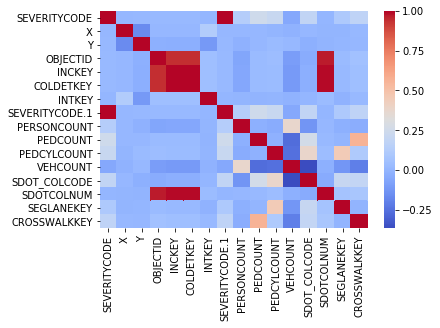

In [7]:
# Ascertain the correlations between the variables

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

This confirms SEVERITYCODE.1 is a duplicate of SEVERITY CODE.  Strong correltation between OBJECTID, INCKEY and COLDETKEY but these are not useful to the analysis as unique identifies.

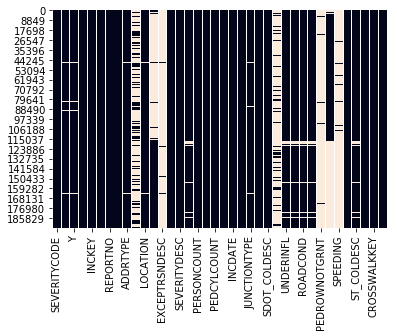

In [8]:
# Determine the NULL Values

sns.heatmap(df.isnull(), cbar=False)

This verifies that SPEEDING and other attributes do not have enough data to be meaningful

C:\Users\warren.clegg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


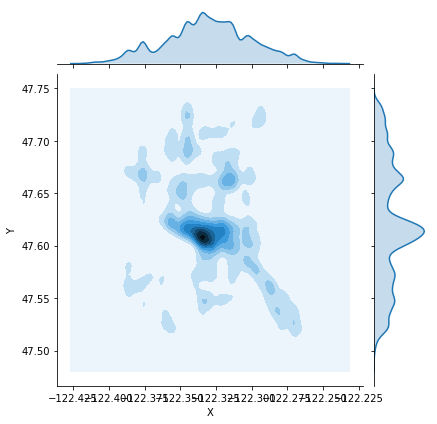

In [9]:
#  This shows the x,y coordinates for the crashes and plots them as a KDE

sns.jointplot(data=df, x="X", y="Y", kind="kde")

This shows that the majority of accidents happen in a set area.   This information is useful as it shows the authorities where they need to patrol or add trafic calming measures.

In [ ]:
#Using maps to visualise the data

import folium
from folium.plugins import HeatMap

heat_df = df[["X", "Y"]].dropna()

map_s = folium.Map(location=[47.6062, -122.3321], zoom_start=16)

heat_data = [[row['Y'],row['X']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(map_s)
map_s

This shows where the data is located on a map of Seattle. 

## Methodology

First we ensure that we have a comparable number of SEVERITY codes 1 and 2.  If not we re-sample the data.

In [12]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

We can see that there is not enough SEVERITY codes 2 so we re-sample.

In [13]:
from sklearn.utils import resample

df_a=df[df.SEVERITYCODE ==1]
df_b=df[df.SEVERITYCODE ==2]
df_c=resample(df_a,replace=False,n_samples=58188,random_state=72)
df_n=pd.concat([df_c,df_b])

df_n["SEVERITYCODE"].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

Based on the exploratory data analysis and an understanding of the data types from https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf the following attributes will be used to train models:  WEATHER, LIGHTCOND, ROADCOND, X, Y.   The weather, light conditions and road conditions can be predicted the day before so this can be used to predict the severity of crash.  

We first need to impute the missing values in the columns.   The median was used for X and Y - both numerical data - wheareas the others used the mode - categorical data.

In [14]:
#Impute values

df["X"] = df["X"].fillna(df["X"].median())
df["Y"] = df["Y"].fillna(df["Y"].median())
df["WEATHER"] = df["WEATHER"].fillna(df["WEATHER"].mode()[0])
df["WEATHER"] = df["WEATHER"].fillna(df["WEATHER"].mode()[0])

We now need to bin the X and Y coordinates into buckets in order to make the analysis computationally efficient.  These buckets could be meshed together to suit police patrols if we knew that data - or the distance from a hospital.

In [15]:
# Bucket X ad Y

bin_labels_20 = ['1','2','3','4','5','6','7','8','9','10',
                '11','12','13','14','15','16','17','18','19','20']

results, bin_edges = pd.qcut(df_n['X'],
                            q=[0,0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                               0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
                            labels=bin_labels_20,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_20),
                            columns=['Threshold', 'Tier'])

bins = results_table.Threshold

names = ['1','2','3','4','5','6','7','8','9','10',
               '11','12','13','14','15','16','17','18','19']

df_n['XBucket'] = pd.cut(df_n['X'], bins, labels=names)

##

results, bin_edges2 = pd.qcut(df_n['Y'],
                            q=[0,0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                               0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
                            labels=bin_labels_20,
                            retbins=True)

results_table2 = pd.DataFrame(zip(bin_edges2, bin_labels_20),
                            columns=['Threshold', 'Tier'])

bins2 = results_table2.Threshold

names = ['1','2','3','4','5','6','7','8','9','10',
               '11','12','13','14','15','16','17','18','19']

df_n['YBucket'] = pd.cut(df_n['Y'], bins2, labels=names)

df_n

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,XBucket,YBucket
166116,1,-122.334288,47.624694,185364,240780,241220,3703903,Matched,Intersection,28760.0,...,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,9,12
632,1,-122.328079,47.604161,715,320881,322381,E920857,Matched,Intersection,29973.0,...,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,11,8
122470,1,-122.317595,47.698108,136093,156099,156119,3645828,Matched,Block,NaN,...,NaN,NaN,NaN,32,One parked--one moving,0,0,N,14,18
188962,1,-122.406179,47.580149,212938,320562,322062,3752926,Matched,Block,NaN,...,NaN,NaN,NaN,32,One parked--one moving,0,0,Y,1,6
45843,1,-122.329092,47.652479,51340,64953,64953,2795553,Matched,Intersection,27263.0,...,NaN,7147006.0,NaN,10,Entering at angle,0,0,N,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,2,-122.299160,47.579673,219536,309335,310615,E880807,Matched,Block,NaN,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,17,6
194666,2,-122.344569,47.694547,219539,309170,310450,E879712,Matched,Block,NaN,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,7,18
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N,19,5
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N,16,17


We now need to truncate the data in order to only use the columns we will use to model

In [16]:
# Only keep relevant columns

df_N=df_n[["SEVERITYCODE","WEATHER","ROADCOND","LIGHTCOND","XBucket","YBucket"]]
df_N

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,XBucket,YBucket
166116,1,Raining,Wet,Dark - Street Lights On,9,12
632,1,Clear,Dry,Daylight,11,8
122470,1,Fog/Smog/Smoke,Dry,Dark - Street Lights On,14,18
188962,1,Clear,Dry,Daylight,1,6
45843,1,Clear,Dry,Daylight,11,14
...,...,...,...,...,...,...
194663,2,Raining,Wet,Daylight,17,6
194666,2,Clear,Wet,Daylight,7,18
194668,2,Clear,Dry,Daylight,19,5
194670,2,Clear,Dry,Daylight,16,17


Next we need to encode the data in order to feed into the ML models

In [17]:
#Encode the attributes

cl = {"WEATHER","ROADCOND","LIGHTCOND","XBucket", "YBucket"}

df_T = pd.get_dummies(data=df_N,columns=cl,prefix=cl)

df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116376 entries, 166116 to 194671
Data columns (total 68 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   SEVERITYCODE                        116376 non-null  int64
 1   ROADCOND_Dry                        116376 non-null  uint8
 2   ROADCOND_Ice                        116376 non-null  uint8
 3   ROADCOND_Oil                        116376 non-null  uint8
 4   ROADCOND_Other                      116376 non-null  uint8
 5   ROADCOND_Sand/Mud/Dirt              116376 non-null  uint8
 6   ROADCOND_Snow/Slush                 116376 non-null  uint8
 7   ROADCOND_Standing Water             116376 non-null  uint8
 8   ROADCOND_Unknown                    116376 non-null  uint8
 9   ROADCOND_Wet                        116376 non-null  uint8
 10  WEATHER_Blowing Sand/Dirt           116376 non-null  uint8
 11  WEATHER_Clear                       116376 non-

## ML Models

First we need to split the data from target (Y) SEVERITYCODE and other fields (X)

In [18]:
X = df_T.drop(["SEVERITYCODE"],axis=1)
y = df_T["SEVERITYCODE"]

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_similarity_score

LR = LogisticRegression(max_iter=10000000, C=9, solver="liblinear")

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

LR.fit(X_train,y_train)


y_pred = LR.predict(X_test) 
print(classification_report(y_test, y_pred))
print(jaccard_similarity_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.63      0.33      0.43     14510
           2       0.55      0.81      0.65     14584

   micro avg       0.57      0.57      0.57     29094
   macro avg       0.59      0.57      0.54     29094
weighted avg       0.59      0.57      0.54     29094

0.5696707224857359


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)

random_forest.fit(X_train,y_train)

y_pred_2 = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred_2))
print(jaccard_similarity_score(y_test,y_pred_2))

              precision    recall  f1-score   support

           1       0.71      0.23      0.35     14510
           2       0.54      0.91      0.68     14584

   micro avg       0.57      0.57      0.57     29094
   macro avg       0.62      0.57      0.51     29094
weighted avg       0.62      0.57      0.51     29094

0.5684333539561421


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import  cross_val_score

DT = DecisionTreeClassifier( max_depth=7)

DT.fit(X_train,y_train)

y_pred_3 = DT.predict(X_test) 


print(classification_report(y_test, y_pred_3))
print(jaccard_similarity_score(y_test,y_pred_3))

              precision    recall  f1-score   support

           1       0.67      0.24      0.35     14510
           2       0.54      0.88      0.67     14584

   micro avg       0.56      0.56      0.56     29094
   macro avg       0.60      0.56      0.51     29094
weighted avg       0.60      0.56      0.51     29094

0.5611122568227126


## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

k=21

knn=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

y_pred_4=knn.predict(X_test)

print(classification_report(y_test, y_pred_4))
print(jaccard_similarity_score(y_test,y_pred_4))

              precision    recall  f1-score   support

           1       0.56      0.49      0.52     14510
           2       0.55      0.62      0.58     14584

   micro avg       0.55      0.55      0.55     29094
   macro avg       0.56      0.55      0.55     29094
weighted avg       0.56      0.55      0.55     29094

0.5542723585619028


## Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state=0)
GB.fit(X_train, y_train)
GradientBoostingClassifier(random_state=0)

y_pred_5 = GB.predict(X_test) 

print(classification_report(y_test, y_pred_5))
print(jaccard_similarity_score(y_test,y_pred_5))

              precision    recall  f1-score   support

           1       0.64      0.33      0.43     14510
           2       0.55      0.82      0.66     14584

   micro avg       0.57      0.57      0.57     29094
   macro avg       0.59      0.57      0.54     29094
weighted avg       0.59      0.57      0.54     29094

0.5720767168488348


## Model Evaluation

In [51]:
from sklearn.metrics import accuracy_score, f1_score

#Logistic Regression

LRA=accuracy_score(y_test, y_pred)
LRJ=jaccard_similarity_score(y_test,y_pred)
LRF=f1_score(y_test,y_pred, average="macro")

#Random Forest

RFA=accuracy_score(y_test, y_pred_2)
RFJ=jaccard_similarity_score(y_test,y_pred_2)
RFF=f1_score(y_test,y_pred_2, average="macro")

#Decision Tree

DTA=accuracy_score(y_test, y_pred_3)
DTJ=jaccard_similarity_score(y_test,y_pred_3)
DTF=f1_score(y_test,y_pred_3, average="macro")

#K Nearest Neigbours

KNA=accuracy_score(y_test, y_pred_4)
KNJ=jaccard_similarity_score(y_test,y_pred_4)
KNF=f1_score(y_test,y_pred_3, average="macro")

#Gradient Boosting

GBA=accuracy_score(y_test, y_pred_5)
GBJ=jaccard_similarity_score(y_test,y_pred_5)
GBF=f1_score(y_test,y_pred_3, average="macro")



cars = {'Logistic Regression': [LRA,LRJ,LRF],
        'Random Forest': [RFA,RFJ,RFF],
        'Decision Tree': [DTA,DTJ,DTF],
        'K Nearest Neighbours': [KNA,KNJ,KNF],
        'Gradient Boosting': [GBA,GBJ,GBF],}

df_t = pd.DataFrame(cars, columns = ['Logistic Regression', 'Random Forest', 'Decision Tree','K Nearest Neighbours', 'Gradient Boosting'],
                    index=['Accuracy','Jaccard','F1'])

print (df_t)

          Logistic Regression  Random Forest  Decision Tree  \
Accuracy             0.569671       0.568433       0.561112   
Jaccard              0.569671       0.568433       0.561112   
F1                   0.542681       0.512100       0.508918   

          K Nearest Neighbours  Gradient Boosting  
Accuracy              0.554272           0.572077  
Jaccard               0.554272           0.572077  
F1                    0.508918           0.508918  


Based on the above table, Gradient Boosting is the best model to predict car accident severity and K Nearest Neighbours is the worst.  However, they are all similar and are not that accurate relative to other  models (slightly higher than 0.50).

## Discussion 

In order to feed the data through five ML models (Logistic Regression, Random Forest, Decision Tree, K Nearest Neighbours and Gradient Boosting) we had to convert data types, inpute missing values and encode the data.   Additionally we had to balance the data.

Accuracy, Jaccard and F1 Score were used to analyses the results of the ML models.  Each model had similar metrics but Gradient boosting was the strongest.  Choosing different k, max depth and hyperparameter C values helped to improve the predictive power of the models.



## Conclusion

It appears that weather conditions and location can be used to predict the severity of the crash (property or injury); however, the simple KDE plot would be the most useful for the authorities.  It can allow the planning and implementation of traffic calming measures, enhanced police patrols, warning signs and potentially the relocation of a ambulance station.

If we were completing this again we would seek further data points which include severitycodes 3 and 4.   Additionally the location of traffic lights etc would be useful to see if they have an impact on crashes.